AUTHOR = Meghana Bhat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bizcorp = pd.read_csv("data.csv", encoding= "unicode_escape")

In [5]:
bizcorp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
bizcorp.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
bizcorp.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [75]:
bizcorp.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# 1. How many unique Invoices, Customer IDs, and Stock Codes, and Item Descriotions can I find in this dataset?

In [77]:
interested_columns = bizcorp[['InvoiceNo', 'StockCode', 'CustomerID', 'Description']]
for col in interested_columns.columns:
    print(col, 
          len(interested_columns[col].unique()) 
          - bool((interested_columns[col].isna().sum())))

InvoiceNo 25900
StockCode 4070
CustomerID 4372
Description 4223


# What do the distributions of Unit Prices and Quantities look like?

In [38]:
bizcorp['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

The dataset contains items with negative unit price. While it is not clear why such values exist yet, for the sake of visualizing the distribution, I will drop those values.

In [70]:
modified_bizc = bizcorp[bizcorp['UnitPrice'] > 0]

In [71]:
modified_bizc['UnitPrice'].describe()

count    539392.000000
mean          4.673648
std          94.614722
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

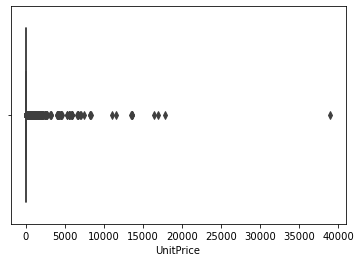

In [72]:
ax = sns.boxplot(x="UnitPrice", data=modified_bizc)

The above visualization is not very useful. The Inter-quartile range is too small and there are several outliers. Let us try a histogram instead. 

<AxesSubplot:ylabel='Frequency'>

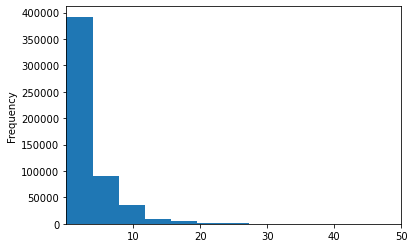

In [61]:
modified_bizc['UnitPrice'].plot.hist(bins=10000, xlim=(0.0001,50))

This distribution shows an extreme right skew, implying most items have a unit price closer to the minimum, and rarely do the prices go above 20 Pounds

In [50]:
bizcorp['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

As with Unit Prices, the Quantities also have negative values. I am unsure why these are present, but for the sake of a better visualization of the distibution, I will drop the values.

In [73]:
modified_bizc = bizcorp[bizcorp['Quantity'] > 0]

In [65]:
modified_bizc['Quantity'].describe()

count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

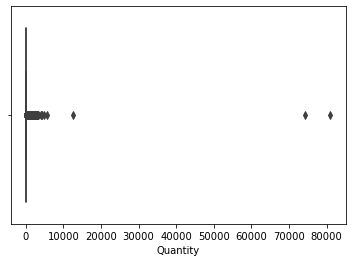

In [74]:
ax = sns.boxplot(x="Quantity", data=modified_bizc)

The above visualization is not very useful. The Inter-quartile range is too small and there are several outliers. Let us try a histogram instead. 

<AxesSubplot:ylabel='Frequency'>

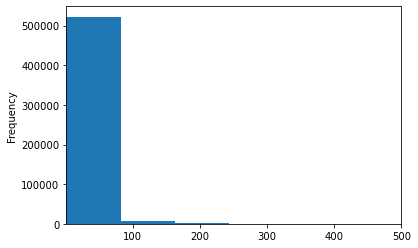

In [69]:
modified_bizc['Quantity'].plot.hist(bins=1000, xlim=(0.99,500))

The distibution of quantity points to one range, between 0 to ~98 being the most populous range. 

# Which country generates the highest revenue? Is it the same as the country that has places the most orders?

In [286]:
Revenues_gen = bizcorp[(bizcorp['UnitPrice'] > 0) & (bizcorp['Quantity'] > 0)]
Revenues_gen['revenues'] = Revenues_gen['UnitPrice'] * Revenues_gen['Quantity']
Revenues_gen.head()

C:\Users\megsr\AppData\Local\Temp/ipykernel_31512/243033772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Revenues_gen['revenues'] = Revenues_gen['UnitPrice'] * Revenues_gen['Quantity']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenues
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [165]:
Revenues_by_country = Revenues_gen.groupby('Country').revenues.sum().sort_values(ascending=False)
Revenues_by_country

Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

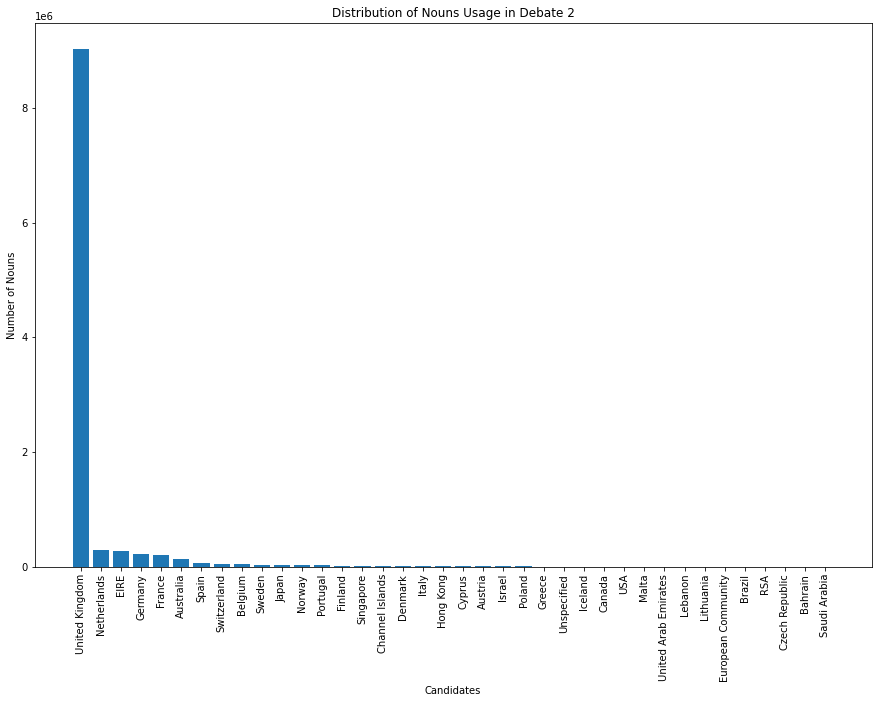

In [99]:
fig = plt.figure(figsize = (15, 10))
#  Bar plot
plt.bar(Revenues_by_country.index, Revenues_by_country)
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.title("Distribution of Nouns Usage in Debate 2")
plt.xticks(rotation = 90) 
plt.show()


The top 5 revenue-generating countries are UK, Netherlands, Ireland, Germany, and France

In [166]:
quantity_by_country = Revenues_gen.groupby('Country').Quantity.sum().sort_values(ascending=False)
quantity_by_country

Country
United Kingdom          4662390
Netherlands              200361
EIRE                     147173
Germany                  119261
France                   112103
Australia                 83901
Sweden                    36083
Switzerland               30629
Spain                     27940
Japan                     26016
Belgium                   23237
Norway                    19336
Portugal                  16258
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Hong Kong                  4773
Israel                     4409
Poland                     3684
Unspecified                3300
Canada                     2763
USA                        2458
Iceland                    2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


The Top 5 countries by Order Quantities is the same as the top 5 revenue-generating countries.

# Which are the most 20 commonly ordered items? What are is their average Unit Price?

In [134]:
most_common_items = Revenues_gen.groupby('Description').Quantity.sum().sort_values(ascending=False).head(20)

In [167]:
prices = []
for item in most_common_items.index:
    prices.append(Revenues_gen[Revenues_gen['Description'] == item].iloc[0].UnitPrice)
summary_quantity = pd.DataFrame()
summary_quantity['Item Description'] = most_common_items.index
summary_quantity['Quantity Ordered'] = most_common_items.values
summary_quantity['Unit Price'] = prices
summary_quantity

,Item Description,Quantity Ordered,Unit Price
0,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08
1,MEDIUM CERAMIC TOP STORAGE JAR,78033,1.04
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,0.29
3,JUMBO BAG RED RETROSPOT,48474,1.65
4,WHITE HANGING HEART T-LIGHT HOLDER,37891,2.55
5,POPCORN HOLDER,36761,0.85
6,ASSORTED COLOUR BIRD ORNAMENT,36461,1.69
7,PACK OF 72 RETROSPOT CAKE CASES,36419,0.42
8,RABBIT NIGHT LIGHT,30788,2.08
9,MINI PAINT SET VINTAGE,26633,0.65


In [135]:
summary_quantity['Unit Price'].describe()

count    20.000000
mean      1.234500
std       0.745022
min       0.290000
25%       0.625000
50%       1.145000
75%       1.755000
max       2.550000
Name: Unit Price, dtype: float64

The average Price of an item among the 20 most ordered items (by quantity) is 1.23 Pounds

# What are the items ordered just once? What is their average Unit Prices?

In [168]:
least_common_items = Revenues_gen.groupby('Description').Quantity.sum()
#least_common_items = item for item in least_common_items if item == 1]
least_common_items = least_common_items[least_common_items == 1]
least_common_items

Description
 I LOVE LONDON MINI RUCKSACK          1
*Boombox Ipod Classic                 1
Adjust bad debt                       1
BAROQUE BUTTERFLY EARRINGS MONTANA    1
BAROQUE BUTTERFLY EARRINGS RED        1
                                     ..
TEA TIME BREAKFAST BASKET             1
TINY CRYSTAL BRACELET RED             1
VINTAGE BEAD PINK JEWEL STAND         1
WATERING CAN SINGLE HOOK PISTACHIO    1
WIRE FLOWER T-LIGHT HOLDER            1
Name: Quantity, Length: 67, dtype: int64

In [169]:
prices = []
for item in least_common_items.index:
    prices.append(Revenues_gen[Revenues_gen['Description'] == item].iloc[0].UnitPrice)
summary_quantity_least = pd.DataFrame()
summary_quantity_least['Item Description'] = least_common_items.index
summary_quantity_least['Quantity Ordered'] = least_common_items.values
summary_quantity_least['Unit Price'] = prices
summary_quantity_least.head(10)

,Item Description,Quantity Ordered,Unit Price
0,I LOVE LONDON MINI RUCKSACK,1,4.15
1,*Boombox Ipod Classic,1,16.98
2,Adjust bad debt,1,11062.06
3,BAROQUE BUTTERFLY EARRINGS MONTANA,1,3.73
4,BAROQUE BUTTERFLY EARRINGS RED,1,3.73
5,BLACK GLASS/SHELL/PEARL NECKLACE,1,9.15
6,BLACKCHRISTMAS TREE 30CM,1,1.25
7,BLOSSOM IMAGES SCRAP BOOK SET,1,4.95
8,BLUE CRYSTAL BOOT PHONE CHARM,1,1.66
9,BLUE DROP EARRINGS W BEAD CLUSTER,1,3.32


In [157]:
summary_quantity_least['Unit Price'].describe()

count       67.000000
mean       171.395075
std       1350.708867
min          0.420000
25%          2.025000
50%          3.360000
75%          6.600000
max      11062.060000
Name: Unit Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

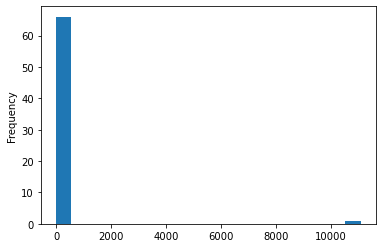

In [163]:
summary_quantity_least['Unit Price'].plot.hist(bins=20)

As expected, infrequnetly ordered items have higher average cost.

References:

1. https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s



# What is the average Order Quantity for a stock code?

In [307]:
Quantity_per_code = Revenues_gen.groupby("StockCode").Quantity.sum()
Quantity_per_code.describe()

count     3922.000000
mean      1424.879143
std       3585.736125
min          1.000000
25%         54.000000
50%        371.500000
75%       1394.750000
max      80995.000000
Name: Quantity, dtype: float64

In [309]:
Quantity_per_code.sort_values(ascending=False).head(10)

StockCode
23843     80995
23166     78033
22197     56921
84077     55047
85099B    48474
85123A    37660
84879     36461
21212     36419
23084     30788
22492     26633
Name: Quantity, dtype: int64

The Stock Codes for highest Order Quantities are listed above. The average quantity of order for a Stock Code is 1424

# Can we group customers by the revenue generated? What should these classes look like?

This part of the analysis is dependent on the Customer IDs and rows with no customer IDs will not add to the analysis. Dropping Null Customer Ids

In [183]:
revenues_by_customers = Revenues_gen[Revenues_gen['CustomerID'].notna()]

In [184]:
revenues_by_customers  = revenues_by_customers.groupby('CustomerID').revenues.sum()
revenues_by_customers.head(10)

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
12352.0     2506.04
12353.0       89.00
12354.0     1079.40
12355.0      459.40
12356.0     2811.43
Name: revenues, dtype: float64

In [185]:
revenues_by_customers.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: revenues, dtype: float64

The Quartiles are at 307, 674, and 1661. Let the categories then by low_revenue_customers, mid_revenue_customers, and high_revenue_customers. I'm selecting the low_revenue customers to be between 0 to 308, then mid_value to be between 308 to 1660 since 75% of the data fits this range, and then high value customers would be the remaining 25%.

In [211]:
segmentation = pd.DataFrame()
segmentation['Revenue'] = revenues_by_customers
segmentation['CustomerID'] = revenues_by_customers.index
segmentation['indices'] = range(1, len(segmentation) + 1)
labels = ['Low Value', 'Mid Value', 'High Value']
segmentation['Revenue Category'] = pd.cut(segmentation['Revenue'], bins = [0,308,1660,280207], right=False, labels=labels)
segmentation = segmentation.set_index('indices')
segmentation

,Revenue,CustomerID,Revenue Category
indices,,,
1,77183.60,12346.0,High Value
2,4310.00,12347.0,High Value
3,1797.24,12348.0,High Value
4,1757.55,12349.0,High Value
5,334.40,12350.0,Mid Value
...,...,...,...
4334,180.60,18280.0,Low Value
4335,80.82,18281.0,Low Value
4336,178.05,18282.0,Low Value


In [212]:
segmentation['Revenue Category'].value_counts()

Mid Value     2156
Low Value     1093
High Value    1089
Name: Revenue Category, dtype: int64

# What items do the High Value customers buy? Which countries are they from?

In [242]:
def return_category(id):
    return(segmentation[segmentation['CustomerID'] == id]['Revenue Category'].iloc[0])

In [243]:
revenues_by_customers = Revenues_gen[Revenues_gen['CustomerID'].notna()]
revenues_by_customers['Category of customers'] = ['']*len(revenues_by_customers)
revenues_by_customers['Category of customers'] = revenues_by_customers['CustomerID'].apply(return_category)
revenues_by_customers.head()

C:\Users\megsr\AppData\Local\Temp/ipykernel_31512/4181972151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenues_by_customers['Category of customers'] = ['']*len(revenues_by_customers)
C:\Users\megsr\AppData\Local\Temp/ipykernel_31512/4181972151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenues_by_customers['Category of customers'] = revenues_by_customers['CustomerID'].apply(return_category)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenues,Category of customers
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,High Value
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,High Value
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,High Value
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,High Value
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,High Value


In [244]:
High_Value  = revenues_by_customers[revenues_by_customers['Category of customers'] == 'High Value']

In [247]:
High_Value_items = High_Value.groupby('Description').revenues.sum().sort_values(ascending=False)
High_Value_items.head(20)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              121554.70
WHITE HANGING HEART T-LIGHT HOLDER     80681.15
MEDIUM CERAMIC TOP STORAGE JAR         80624.39
JUMBO BAG RED RETROSPOT                76390.42
POSTAGE                                61236.64
PARTY BUNTING                          55789.48
Manual                                 50522.54
RABBIT NIGHT LIGHT                     45485.73
ASSORTED COLOUR BIRD ORNAMENT          42238.62
CHILLI LIGHTS                          40939.56
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               33958.13
JUMBO BAG PINK POLKADOT                33693.05
PAPER CHAIN KIT 50'S CHRISTMAS         32952.33
WOOD BLACK BOARD ANT WHITE FINISH      30868.66
DOORMAT KEEP CALM AND COME IN          29979.64
SPOTTY BUNTING                         29638.85
JUMBO BAG STRAWBERRY                   28050.72
SET OF 3 CAKE TINS PANTRY DESIGN       27380.95
Name: revenues, dtype: float

Let's compare these with the 20 items that were bought in the most quantity (referring to a dataframe create earlier)

In [246]:
summary_quantity

,Item Description,Quantity Ordered,Unit Price
0,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08
1,MEDIUM CERAMIC TOP STORAGE JAR,78033,1.04
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,0.29
3,JUMBO BAG RED RETROSPOT,48474,1.65
4,WHITE HANGING HEART T-LIGHT HOLDER,37891,2.55
5,POPCORN HOLDER,36761,0.85
6,ASSORTED COLOUR BIRD ORNAMENT,36461,1.69
7,PACK OF 72 RETROSPOT CAKE CASES,36419,0.42
8,RABBIT NIGHT LIGHT,30788,2.08
9,MINI PAINT SET VINTAGE,26633,0.65


In [259]:
common_items = set(summary_quantity['Item Description']).intersection(set(High_Value_items.index[0:20]))
common_items

{'ASSORTED COLOUR BIRD ORNAMENT',
 'JUMBO BAG PINK POLKADOT',
 'JUMBO BAG RED RETROSPOT',
 'MEDIUM CERAMIC TOP STORAGE JAR',
 "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'PAPER CRAFT , LITTLE BIRDIE',
 'RABBIT NIGHT LIGHT',
 'WHITE HANGING HEART T-LIGHT HOLDER'}

The items listed above are highest revenue generating bought by High Value Customers and are among the 20 most highest quantity buys

In [262]:
High_Value_countries = High_Value.groupby('Country').revenues.sum().sort_values(ascending=False)
High_Value_countries.head(10)

Country
United Kingdom    5629496.381
Netherlands        280206.020
EIRE               265545.900
Germany            194078.540
France             174694.670
Australia          134970.820
Spain               47768.960
Switzerland         45381.990
Japan               35229.120
Norway              35065.630
Name: revenues, dtype: float64

The above list the Countries are where the top-revenue generating High Value customers are from.

# Revenue Distribution by Month


In [287]:
Revenues_gen['InvoiceDate'] = pd.to_datetime(Revenues_gen['InvoiceDate'])

C:\Users\megsr\AppData\Local\Temp/ipykernel_31512/1989545259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Revenues_gen['InvoiceDate'] = pd.to_datetime(Revenues_gen['InvoiceDate'])


In [288]:
Revenues_gen['Month'] = Revenues_gen['InvoiceDate'].dt.month_name()

C:\Users\megsr\AppData\Local\Temp/ipykernel_31512/3617845067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Revenues_gen['Month'] = Revenues_gen['InvoiceDate'].dt.month_name()


In [289]:
Revenues_gen.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenues,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December


In [300]:
Revenue_by_month = Revenues_gen.groupby('Month').revenues.sum().sort_values(ascending=False)
Revenue_by_month

Month
November     1509496.330
December     1462538.820
October      1154979.300
September    1058590.172
May           770536.020
June          761739.900
August        759138.380
July          719221.191
March         717639.360
January       691364.560
April         537808.621
February      523631.890
Name: revenues, dtype: float64

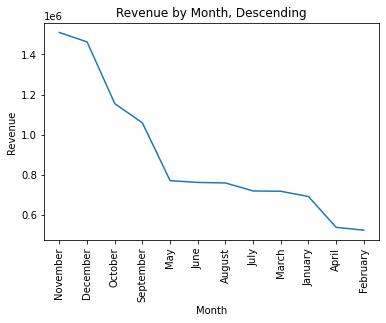

In [301]:
plt.plot(Revenue_by_month.index, Revenue_by_month)
plt.title('Revenue by Month, Descending')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation = 90) 
plt.show()

In [317]:
type(Revenue_by_month)

pandas.core.series.Series

In [318]:
Revenue_of_month_df = pd.DataFrame()
Revenue_of_month_df['Months'] = Revenue_by_month.index
Revenue_of_month_df['TotalRevenue'] = Revenue_by_month.values
Revenue_of_month_df

,Months,TotalRevenue
0,November,1509496.330
1,December,1462538.820
2,October,1154979.300
3,September,1058590.172
4,May,770536.020
5,June,761739.900
6,August,759138.380
7,July,719221.191
8,March,717639.360
9,January,691364.560
